In [1]:
#this file computes the pairing matrix for a given number of pairs and levels and solves the eigenvalue problem
import numpy as np
from numpy import linalg as la
from sympy.utilities.iterables import multiset_permutations as mup
import matplotlib.pyplot as plt
import math
import array

In [2]:
def binomial(a,b):
    return math.factorial(a)/(math.factorial(a-b)*math.factorial(b))

In [32]:
def makeslaterdeterminants(noofpairs,nooflevels):
    noofslaterdeterminants = int(binomial(nooflevels, noofpairs)) #number of Slater determinants
    creationarray = np.concatenate((np.ones(noofpairs), np.zeros(nooflevels-noofpairs))) #Array with ones for pairs, other levels are filled with zeros
    slaterdeterminants = np.zeros(shape=(noofslaterdeterminants,nooflevels))
    i = 0
    for p in mup(creationarray):
        slaterdeterminants[i] = p #Slater determinants are set as all distinct permutations of the creationarray
        i += 1
    return noofslaterdeterminants, slaterdeterminants

In [33]:
makeslaterdeterminants(2,4)

(6, array([[0., 0., 1., 1.],
        [0., 1., 0., 1.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 1., 0., 0.]]))

In [4]:
def pairingmatrixelement(noofpairs,nooflevels,slaterdet1,slaterdet2,d,g):
    noofsamelevels = np.dot(slaterdet1,slaterdet2) #this gives the number levels that are occupied in the bra-state as well as in the ket-state
    if noofsamelevels == noofpairs: #diagonal matrix elements
        singleparticleenergyfactor = sum(np.nonzero(slaterdet1)[0])
        returnvalue = 2*singleparticleenergyfactor*d - noofpairs*g/2
    elif noofsamelevels == noofpairs - 1: #matrix elements where bra and ket differ in one pair
        returnvalue = -g/2
    else: #Slater-Condon rule
        returnvalue = 0
    #print(returnvalue)
    return returnvalue

In [34]:
pairingmatrixelement(2,4,[1,0,0,1],[1,0,1,0],1,.3)

-0.15

In [5]:
def makepairingmatrix(noofpairs,nooflevels,d,g):
    matrixsize, slaterdeterminants = makeslaterdeterminants(noofpairs,nooflevels) #setting up necessary Slater determinants
    pairingmatrix = np.zeros(shape=(matrixsize,matrixsize)) 
    for i in range(matrixsize):
        for j in range(i,matrixsize):
            pairingmatrix[-i-1,-j-1] = pairingmatrixelement(noofpairs,nooflevels,slaterdeterminants[i],slaterdeterminants[j],d,g) #matrix elements 
            #are filled up from the bottom such that the lowest states are placed in the beginning
    #print(pairingmatrix)
    pairingmatrix = pairingmatrix + pairingmatrix.T - np.diag(pairingmatrix.diagonal()) #makes matrix symmetric from up-right triangle
    #print(pairingmatrix)
    return pairingmatrix

In [35]:
makepairingmatrix(2,4,1,.3)

array([[ 1.7 , -0.15, -0.15, -0.15, -0.15,  0.  ],
       [-0.15,  3.7 , -0.15, -0.15,  0.  , -0.15],
       [-0.15, -0.15,  5.7 ,  0.  , -0.15, -0.15],
       [-0.15, -0.15,  0.  ,  5.7 , -0.15, -0.15],
       [-0.15,  0.  , -0.15, -0.15,  7.7 , -0.15],
       [ 0.  , -0.15, -0.15, -0.15, -0.15,  9.7 ]])

In [16]:
def solveeigenvalues(noofpairs,nooflevels,d):
    noofpoints = 21  
    matrixsize = int(binomial(nooflevels, noofpairs))    
    garray = np.linspace(-1,1,noofpoints) #values of g for which the problem is solved
    gmateigenvalues = np.zeros(shape=(noofpoints,matrixsize)) #setting up other arrays
    gmateigenvaluessorted = np.zeros(shape=(noofpoints,matrixsize))
    gmatgscorrelationenergy = np.zeros(noofpoints)
    gmateigenvectors = np.zeros(shape=(noofpoints,matrixsize,matrixsize))
    gmatgroundstateeigenvectorfirstcomponents = np.zeros(noofpoints)
    for x in range(noofpoints): #solving the eigenvalue problems
        gmateigenvalues[x], gmateigenvectors[x] = la.eig(makepairingmatrix(noofpairs,nooflevels,d,garray[x]))
        gmateigenvaluessorted[x] = np.sort(gmateigenvalues[x])
        gmatgscorrelationenergy[x] = gmateigenvaluessorted[x,0]-(makepairingmatrix(noofpairs,nooflevels,d,garray[x])[0,0]) 
        gmatgroundstateeigenvectorfirstcomponents[x] = abs(gmateigenvectors[x,0,0])
        
        for i in range(matrixsize):
            if gmateigenvaluessorted[x,0] == gmateigenvalues[x,i]:
                gmatgroundstateeigenvectorfirstcomponents[x] = abs(gmateigenvectors[x,0,i])
                break
    
    plt.figure() #doing all the plots
    plt.xlabel(r'Interaction strength $g$', fontsize=12)
    plt.ylabel(r'Eigenvalues', fontsize=12)    
    plt.plot(garray,gmateigenvaluessorted,"-*")
    plt.show() 
    #plt.savefig("eigenvalues.pdf")
    
    plt.figure()
    plt.xlabel(r'Interaction strength $g$', fontsize=12)
    plt.ylabel(r'Correlation energy', fontsize=12)    
    plt.plot(garray,gmatgscorrelationenergy,"-*")
    plt.show() 
    #plt.savefig("corr_energy.pdf")
    
    plt.figure()
    plt.xlabel(r'Interaction strength $g$', fontsize=12)
    plt.ylabel(r'Strength of first SD in GS', fontsize=12)
    plt.plot(garray,gmatgroundstateeigenvectorfirstcomponents,"-*")
    plt.show() 
    #plt.savefig("gs_strength.pdf")   

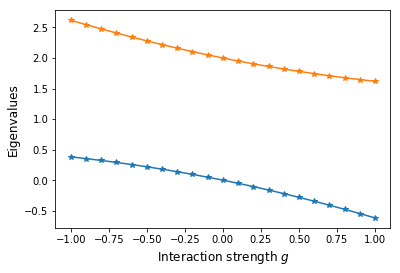

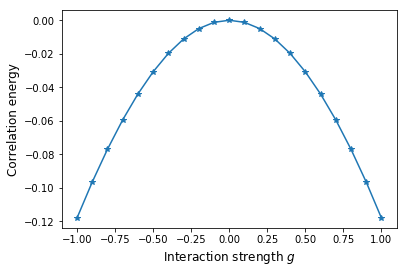

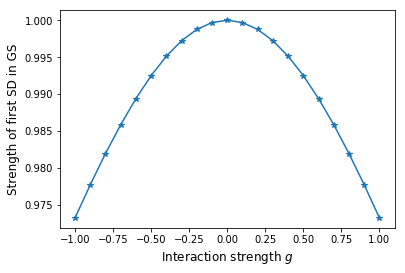

In [19]:
solveeigenvalues(1,2,1)

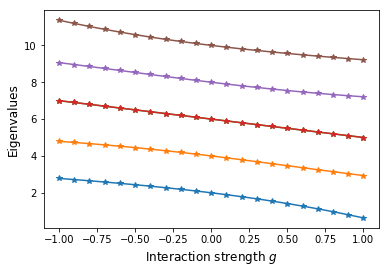

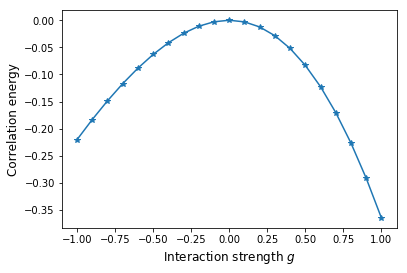

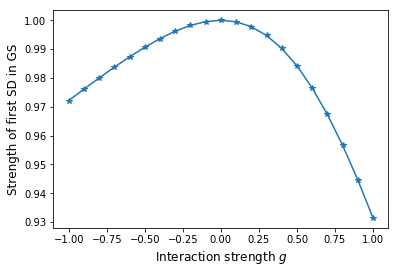

In [18]:
solveeigenvalues(2,4,1)

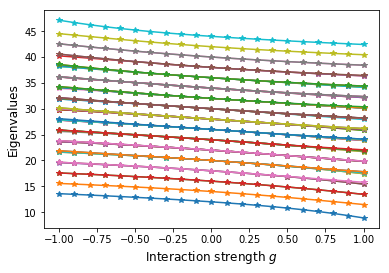

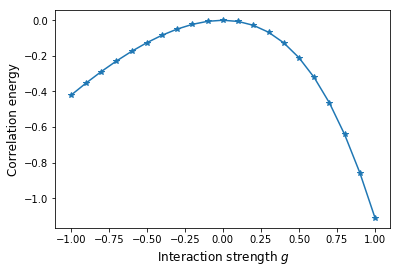

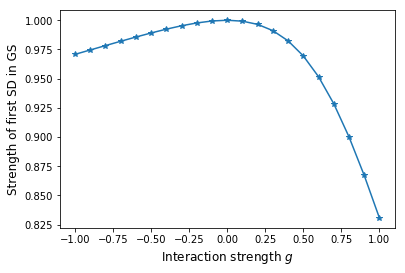

In [17]:
solveeigenvalues(4,8,1)